In [14]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('ch2_scores_em.csv', index_col='student number')

# 데이터 이해

## 대푯값

- 여러 데이터들을 하나의 값으료 요약한 지표
- 데이터의 특징을 한 번에 파악하기 쉽다.
- 데이터 해석에 있어 오류에 빠지기 쉽다.
  - 다양한 지표를 함께 보고, 데이터를 시각화해보는 것이 좋다.

### 평균

#### 산술 평균

- 모든 데이터를 더한 후 데이터의 개수만큼 나누어서 얻은 값이다.
- 이상치에 민감하다.
- 편차의 합이 0이다.
$$\bar{x} = \frac{1}{n}\sum_{i=1}^nx_i=\frac{1}{n}(x_1+x_2+\cdots+x_n)$$

In [16]:
print(df.describe())

eng_s = df['english']
print(eng_s.mean())

math_np = np.array(df['mathematics'])
print(math_np.mean())

         english  mathematics
count  50.000000    50.000000
mean   58.380000    78.880000
std     9.799813     8.414371
min    37.000000    57.000000
25%    54.000000    76.000000
50%    57.500000    80.000000
75%    65.000000    84.000000
max    79.000000    94.000000
58.38
78.88


#### 절사 평균

- 양 극단치의 일부를 제외하고 구한 산술 평균
- 과제 평가 시 많이 사용된다.
  - 5명이 평가한다고 하면, 최고점 1명과 최저점 1명을 제외한 3명의 점수를 이용해서 평균을 구한다.

In [17]:
eng_trimmed_mean = (eng_s.sum() - (eng_s.max() + eng_s.min())) / eng_s.count()
eng_trimmed_mean

56.06

#### 기하 평균

- 산술 평균이 합의 평균이라면, 기하 평균은 곱의 평균이다.
- 성장률의 평균 계산에 많이 사용된다.
$$\sqrt[n]{x_1\times x_2\times x_3 \times \cdots \times x_n}$$

In [31]:
# scipy 사용
from scipy.stats import gmean

print(gmean(eng_s))

# numpy 사용
def g_mean(x):
    a = np.log(x)
    return np.exp(a.mean())

print(g_mean(eng_s))

57.51821911372058
57.51821911372063


#### 조화 평균

- 역수의 산술 평균의 역수이다. 역수의 차원에서 평균을 구하고, 다시 역수를 취해 원래의 차원 값으로 돌아온다.
- 평균적인 변화율을 구할 때 주로 사용된다.
- F-1 score 계산 시 사용된다.
$$\frac{n}{\sum_{i=1}^n \frac{1}{x_i}}$$

In [34]:
eng_harmonic_mean = 1/(np.mean(1/eng_s))
eng_harmonic_mean

56.59597940742787

#### 관계

- 조화 평균 < 기하 평균 < 산술 평균

$$
\frac{n}{\sum_{i=1}^n \frac{1}{x_i}} \leq \sqrt[n]{x_1\times x_2\times x_3 \times \cdots \times x_n} \leq \frac{1}{n}\sum_{i=1}^n x_i
$$

### 중앙값

- 데이터를 크기 순서대로 나열했을 때 정확히 중앙에 위치한 값이다.
- 이상값에 영향을 덜 받는다.
- 데이터의 개수가 홀수라면 $\frac{(n+1)}{2}$번째 데이터가 중앙값
- 데이터의 개수가 짝수라면 $\frac{n}{2}$번째 데이터와 $\frac{(n+1)}{2}$번째 데이터의 평균이 중앙값

In [36]:
sorted_eng_s = np.sort(eng_s)
sorted_eng_s

np.median(sorted_eng_s)

57.5

### 최빈값

- 데이터 중에서 가장 많이 나타나는 값이다.

In [39]:
eng_s.mode()

0    57
Name: english, dtype: int64

# 편차

- 각 데이터가 평균으로부터 떨어져 있는 정도이다.

In [41]:
scores = df['mathematics']
mean = np.mean(scores)
deviation = scores - mean
deviation.head()

student number
1   -13.88
2     1.12
3   -15.88
4   -15.88
5    -2.88
Name: mathematics, dtype: float64

- 편차에도 대푯값이 필요하다.
  - 값이 많아지면 한 눈에 편차가 얼마나 되는지 알기 어렵다.
  - 두 데이터 사이에 어느 데이터가 편차가 큰지 비교하기 어렵다.
  - 편차의 평균은 항상 0이다.
$$\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})=\frac{1}{n} \sum_{i=1}^n x_i-\frac{1}{n} \sum_{i=1}^n \bar{x} =\bar{x}-\bar{x}=0$$
  - 그러므로 다른 방식으로 대푯값을 구해야 한다.
    - 편차 절댓값의 평균 - 평균 절대 편차, 평균 편차
    - 편차 제곱의 평균 - 분산
    - 편차 제곱의 평균에 제곱근 - 표준 편차

## 평균 절대 편차, 평균 편차

$$
\frac{1}{n} \sum_{i=1}^n \lvert{x_i}-\bar{x}\rvert
$$

- 잘 안 쓰인다.
- 평균 편차의 최솟값은 중앙값이다.
- 평균 편차는 미분이 불가능하다.
- 절댓값 계산이 사칙연산에 비해 복잡하다.

# 분산

- 편차의 제곱의 평균이다.

In [43]:
df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
eng_s = df['english']
eng_np = np.array(eng_s)
eng_dev = eng_s - np.mean(eng_s)
np.mean(eng_dev ** 2)

94.11560000000001

## 모분산

- 모집단에 대한 분산이다.

$$
\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2
$$

In [48]:
# numpy
print(np.var(eng_s))
#pandas
print(eng_s.var(ddof=0))

94.11560000000001
94.11560000000001


### 표본 분산

- 표본에 대한 분산이다.

$$
\frac{1}{n-1} \sum_{i=1}^n (x_i-\bar{x})^2
$$

In [51]:
# numpy
print(np.var(eng_s, ddof=1))
# pandas
print(eng_s.var())

96.03632653061226
96.03632653061226


# 표준 편차

- 분산에 제곱근한 값이다.
- 분산의 경우 제곱할 때 데이터가 크게 증가하기 때문에 값 자체의 의미를 파악하기 어렵다.
- 그래서 분산에 루트를 씌워 원래 단위로 맞추는 과정을 해준 것이 표준 편차이다.

$$
\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2}
$$

- 제곱에 제곱근을 씌웠기 때문에 단위가 원래 데이터와 같아진다는 장점이 있다.

In [52]:
# numpy
print(np.std(eng_s)) # 모 표준 편차
print(np.std(eng_s, ddof=1)) # 표본 표준 편차
# pandas
print(eng_s.std(ddof=0)) # 모 표준 편차
print(eng_s.std()) # 표본 표준 편차

9.70131949788275
9.799812576300235
9.70131949788275
9.799812576300235


# 범위

- 최댓값에서 최솟값을 뺀 값

In [53]:
np.max(eng_s) - np.min(eng_s)

42

# 사분위 범위

- 범위는 이상값에 민감하다.
- 따라서 범위를 나누어 계산해야 한다.

## 사분위수

- 데이터를 정렬한 후, 하위 25%, 50%, 75%에 해당하는 값을 1/4, 2/4, 3/4 분위수라고 한다.
  - 2/4 분위수는 중앙값이다.

In [54]:
q2 = np.percentile(eng_s, 50)
q2 == np.median(eng_s)

True

## 사분위 범위

- 3/4 분위수(Q3) - 1/4 분위수(Q1)
- numpy에선 25, 50, 75를 사용하고, pandas에선 0.25, 0.5, 0.75를 사용한다.

In [69]:
# numpy
q1 = np.percentile(eng_s, 25)
q2 = np.percentile(eng_s, 50)
q3 = np.percentile(eng_s, 75)
print(q3 - q1)

# pandas
q1 = eng_s.quantile(.25)
q2 = eng_s.quantile(.5)
q3 = eng_s.quantile(.75)
print(q3 - q1)

11.0
11.0


# 상자 그림

<AxesSubplot:>

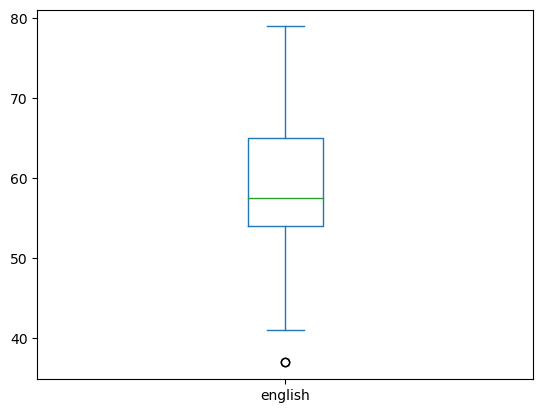

In [66]:
eng_s.plot(kind='box')

# 데이터 정규화

## 필요성

- 평균과 분산이 다른 데이터를 비교하기 위해
- 표준화, 편찻값 등이 있다.

## 표준화

- 데이터에서 평균을 빼고 표준 편차로 나누는 작업이다.
$$
z_i=\frac{x_i-\bar{x}}{S}
$$
- 표준화된 데이터를 표준화 변량 또는 Z-score 라고 한다.
- 표준화된 데이터는 단위가 없다.

In [73]:
df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
eng_s = df['english']
eng_z = (eng_s - eng_s.mean()) / np.std(eng_s)

math_s = df['mathematics']
math_z = (math_s - math_s.mean()) / np.std(math_s)

df.insert(1, 'eng_z', eng_z)
df.insert(len(df.columns), 'math_z', math_z)

df.head()

,english,eng_z,mathematics,math_z
student number,,,,
1,42,-1.688430,65,-1.666306
2,69,1.094696,80,0.134457
3,56,-0.245327,63,-1.906408
4,41,-1.791509,63,-1.906408
5,57,-0.142249,76,-0.345747


In [75]:
df_z = (df - df.mean()) / df.std(ddof=0)
df_z.head()

,english,eng_z,mathematics,math_z
student number,,,,
1,-1.688430,-1.688430,-1.666306,-1.666306
2,1.094696,1.094696,0.134457,0.134457
3,-0.245327,-0.245327,-1.906408,-1.906408
4,-1.791509,-1.791509,-1.906408,-1.906408
5,-0.142249,-0.142249,-0.345747,-0.345747


## 편찻값(T-score)

- 데이터에서 특정한 데이터가 얼마나 특수한지를 측정하는 지표이다.
- 평균이 50, 표준 편차가 10이 되도록 정규화하는 것을 의미한다.
$$
t_i=50+10\times z_i
$$
- Z-score가 음수와 양수에 걸쳐 분포하는 것을 재설정하여 가독성이 향상된다.
  - T-score로도 음수가 나올 수 있긴 하지만 매우 희박하다(2.86e-5%)

In [80]:
df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
eng_s = df['english']
eng_z = (eng_s - eng_s.mean()) / np.std(eng_s)
eng_t = 50 + 10 * eng_z

df = df.drop(['mathematics'], axis=1)
df.insert(len(df.columns), 'eng_z', eng_z)
df.insert(len(df.columns), 'eng_t', eng_t)

df.head()

,english,eng_z,eng_t
student number,,,
1,42,-1.688430,33.115699
2,69,1.094696,60.946964
3,56,-0.245327,47.546725
4,41,-1.791509,32.084911
5,57,-0.142249,48.577513


# 도수분포표

- 데이터가 취하는 값을 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는가를 세서 표로 정리한 것이다.
- 계급(class): 구간
  - 0 ~ 10, 10 ~ 20, 20 ~ 30, …
- 계급폭(class interval): 구간 길이
  - 10
- 계급값(class midpoint/mark): 구간 대푯값
  - 5, 15, 25, …
- 계급수(bins): 총 계급 수
  - 100점까지 계급폭이 10이므로 계급 수는 10이다.
- 도수(frequency): 계급에 속한 학생 수
  - 0 ~ 10까지는 1, 11 ~ 20 까지는 3, …
- 상대도수(relative frequency)
  - 전체 중 해당 계급이 차지하는 비율
- 누적상대도수(cumulative relative frequency)
  - 현재 계급까지 상대도수의 합

In [83]:
eng_s = pd.read_csv('ch2_scores_em.csv', index_col='student number')['english']

# 도수
# 계급수
freq, bin_edges = np.histogram(eng_s, bins=10, range=(0, 100))
freq, bin_edges

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [86]:
# 계급
bin_edges = [int(be) for be in bin_edges]
_class = [f'{bin_edges[i]}~{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)]
_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [88]:
# pandas 도수분포표
freq_df = pd.DataFrame({'frequency': freq}, index=pd.Index(_class, name='class'))
freq_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [89]:
# 계급값
class_mid = [(i + (i + 10)) // 2 for i in range(0, 100, 10)]
class_mid

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [90]:
# 상대도수
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [91]:
# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

# 히스토그램

- 도수분포표를 막대 그래프로 나타낸 것이다.

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

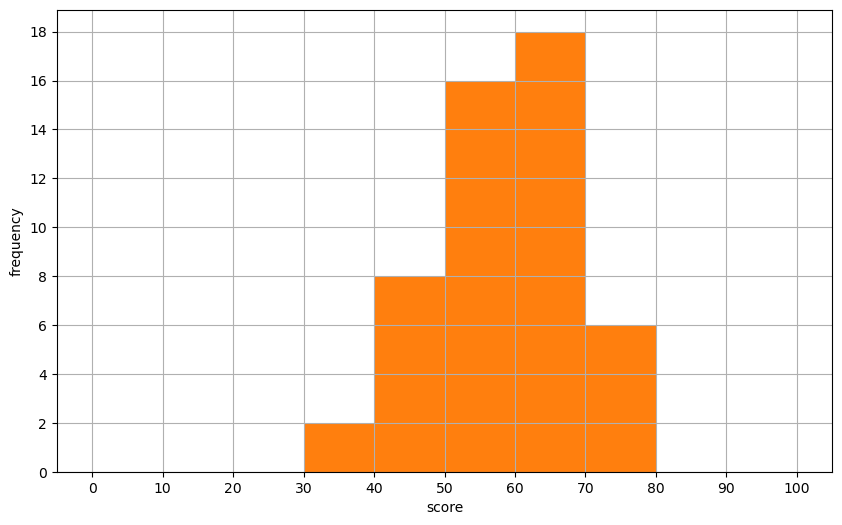

In [101]:
# Pandas Dataframe Histogram
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_xlabel('score')
ax.set_ylabel('frequency')
ax.set_xticks(np.linspace(0, 100, 11))
ax.set_yticks(np.arange(0, 20, 2))

eng_s.hist(range=(0, 100))

# Matploblib histogram
ax.hist(eng_s, range=(0, 100))

<AxesSubplot:>

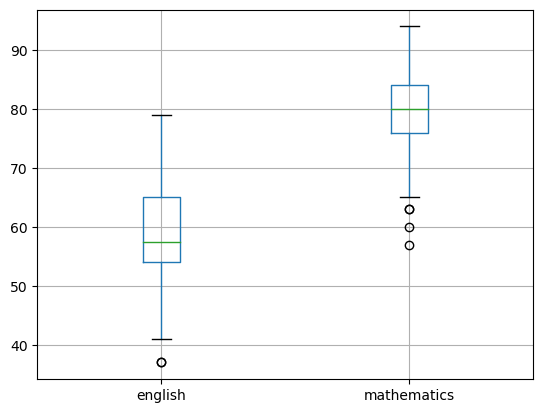

In [102]:
scores_df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
scores_df.boxplot()

<AxesSubplot:>

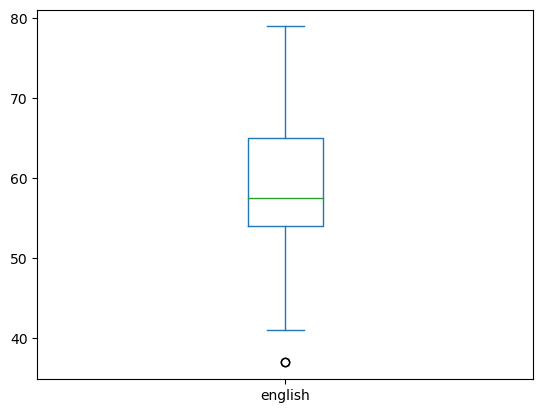

In [105]:
scores_df['english'].plot.box()